# Actividad Final 
## Módulo 7: Aprendizaje no supervisado

    Díaz Cuevas Bruno
    Moreno Sánchez Ángel Andrés
  

### Objetivo:
 Utilizar diversos algoritmos vistos durante el módulo para aplicarlos sobre un conjunto de datos
particular


### Instrucciones:
Selecciona un conjunto de datos que hayas utilizado en alguna de las prácticas desarrolladas y aplica sobre dicho conjunto:

    *Algoritmo de agrupamiento
    *PCA
    *Algoritmo de valores atípicos
    *KernelPCA
    *Manifold Learning
    
Finalmente escribe una reflexión sobre los resultados obtenidos.

## Algoritmo de Agrupamiento: DBScan

DBScan es un algoritmo de clustering determinista que a diferencia de K-means, visualiza a los clusters como áreas de alta densidad separadas por áreas de baja densidad, lo cual le permite formar clusters de cualquier forma a diferencia de la geometría convexa que es inherente de K-means. El elemento principal en DBScan son los _core samples_ los cuales son muestras dentro de las áreas de alta densidad, por lo que aquí un cluster se define como un agrupamiento de _core samples_ (bajo cierta medida de distancia) o de _non-core samples_ cercanos. Existen dos parámetros para el algoritmo: `min_samples` y `eps` los cuales definen la densidad de las áreas de puntos, donde un alto número de muestras mínimas y bajo eps indican una densidad mayor para formar el cluster.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from itertools import product
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN

In [4]:
X,y = load_digits(return_X_y=True)    #importar el dataset

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [154]:
#Buscamos los parametros para DBSCAN que nos generan entre 8 y 15 clusters
for ep,m_s in product(np.linspace(0.1,30),[x for x in range (1,45)]):
    cluster = DBSCAN(eps=ep, min_samples=m_s, n_jobs=-1)
    y_pred = cluster.fit(X).labels_
    if 8<len(Counter(y_pred))<15:
        print(len(Counter(y_pred)))
        print(ep,m_s)

12
9.863265306122448 2
9
11.083673469387755 3
12
11.693877551020408 3
11
12.914285714285713 4
12
13.524489795918367 4
9
13.524489795918367 5
14
14.13469387755102 5
9
14.744897959183673 6
12
15.965306122448979 7
9
15.965306122448979 8
13
16.575510204081635 7
10
16.575510204081635 8
10
16.575510204081635 9
10
17.185714285714287 8
10
17.185714285714287 9
9
17.185714285714287 10
13
17.79591836734694 8
13
17.79591836734694 9
11
17.79591836734694 10
9
17.79591836734694 12
13
18.406122448979595 10
11
18.406122448979595 11
11
18.406122448979595 12
13
19.016326530612247 11
12
19.016326530612247 12
10
19.016326530612247 13
14
19.6265306122449 11
12
19.6265306122449 12
12
19.6265306122449 13
10
19.6265306122449 14
9
19.6265306122449 15
14
20.23673469387755 10
14
20.23673469387755 14
12
20.23673469387755 15
12
20.23673469387755 16
10
20.23673469387755 17
14
20.846938775510203 10
14
20.846938775510203 11
14
20.846938775510203 12
14
20.846938775510203 15
13
20.846938775510203 16
13
20.84693877551020

In [7]:
# Elegimos la combinación de máxima densidad para la condición, mayor número de min numeros para un menor eps
cluster = DBSCAN(eps=24.508163265306123, min_samples=31,n_jobs=-1)
y_pred = cluster.fit(X).labels_

In [8]:
print(Counter(y_pred)) #Vemos los clusters y su número de elementos

Counter({-1: 640, 2: 251, 1: 177, 0: 176, 4: 125, 3: 121, 5: 116, 6: 99, 7: 39, 8: 31, 9: 22})


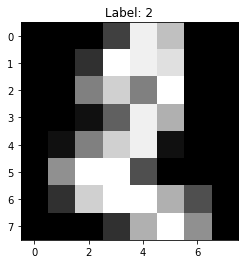

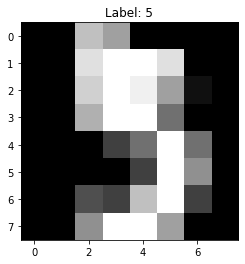

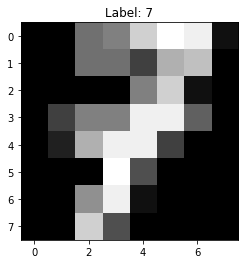

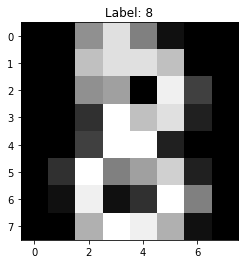

In [9]:
%matplotlib inline
# Visualizamos cuales fueron los elementos que se agrupó como ruido ie. label =-1
X_outliers = X[y_pred==-1]
y_outliers = y[y_pred==-1]
for i in range(4):
    x = X_outliers[i]
    y_ = y_outliers[i]
    number = x.reshape(8,8)
    plt.imshow(number, cmap='gray')
    plt.title(f'Label: {y_}')
    plt.show()


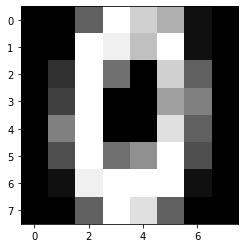

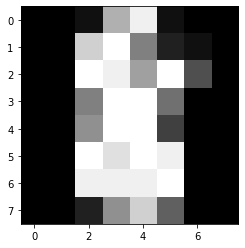

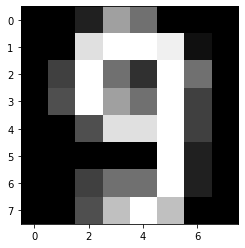

In [10]:
# Visualizamos los elementos que sí son core samples
X_clust = X[y_pred!=-1]
for x in X_clust[-3:]:
    noise_ex = x.reshape(8,8)
    plt.imshow(noise_ex, cmap='gray')
    plt.show()

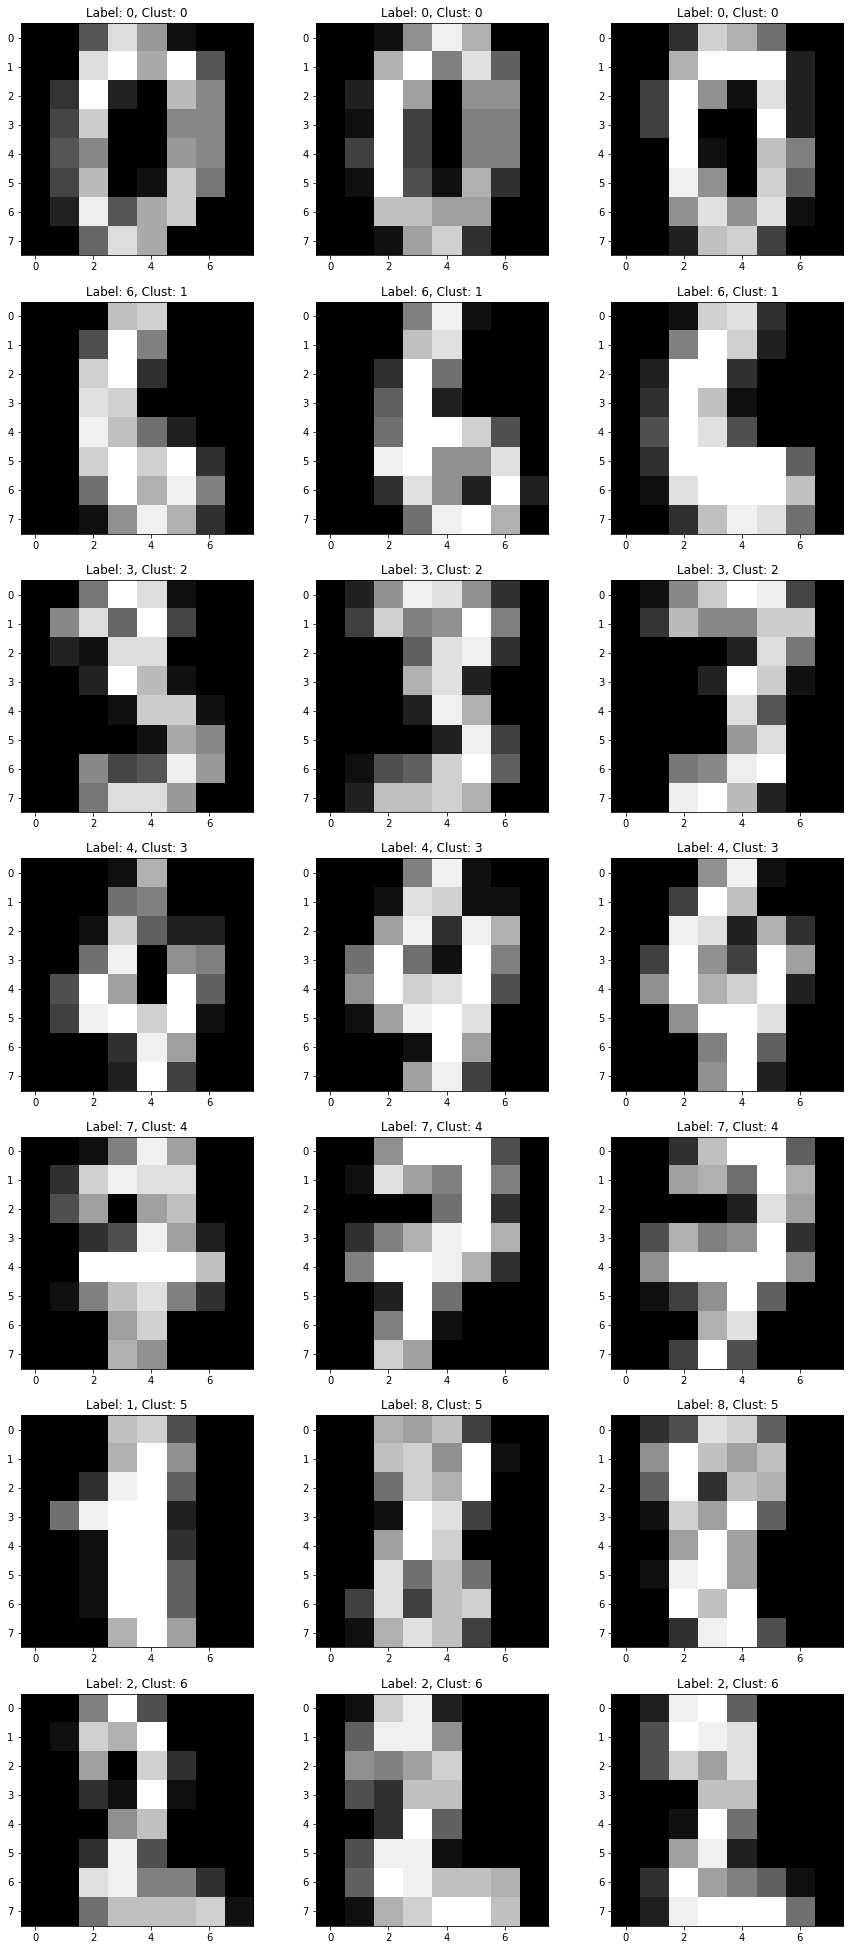

In [11]:
#Comparación entre el clustering por DBScan y las labels originales
fig, ax = plt.subplots(7,3,figsize=(15,35))
for j in range(0,7):
    X_verf = X[y_pred==j]
    y_verf = y[y_pred==j]
    for i in range(3):
        x = X_verf[i]
        y_ = y_verf[i]
        noise_ex = x.reshape(8,8)
        ax[j][i].imshow(noise_ex, cmap='gray')
        ax[j][i].set_title(f'Label: {y_}, Clust: {j}')
plt.show()

In [12]:
from scipy import stats
# Verificamos los clusters por la moda 
for k in range(10):
    y_f = y[y_pred==k]
    y_mode = stats.mode(y_f)
    y_per = (y_mode[1][0] / len(y_f))*100
    print(f'Cluster: {k}, label: {y_mode[0][0]} by {y_per}%')

Cluster: 0, label: 0 by 100.0%
Cluster: 1, label: 6 by 98.87005649717514%
Cluster: 2, label: 3 by 55.77689243027888%
Cluster: 3, label: 4 by 100.0%
Cluster: 4, label: 7 by 100.0%
Cluster: 5, label: 1 by 80.17241379310344%
Cluster: 6, label: 2 by 100.0%
Cluster: 7, label: 5 by 100.0%
Cluster: 8, label: 5 by 100.0%
Cluster: 9, label: 5 by 100.0%


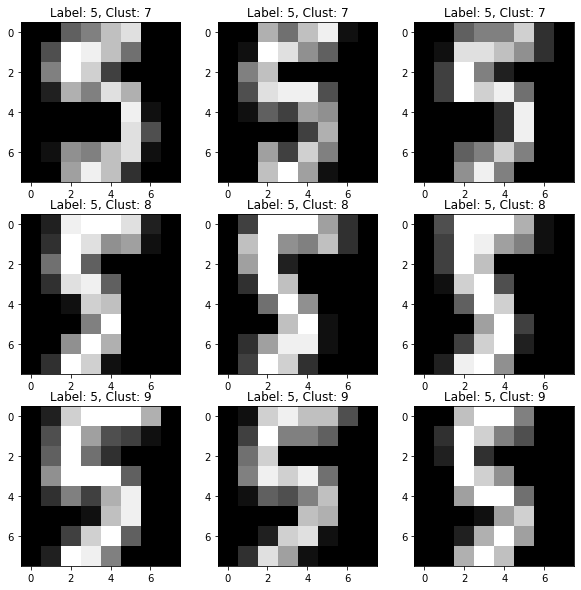

In [13]:
# Visualización de las diferencias entre los clusters 7.8 y 9
fig, ax = plt.subplots(3,3,figsize=(10,10))
for j in range(7,10):
    X_verf = X[y_pred==j]
    y_verf = y[y_pred==j]
    for i in range(3):
        x = X_verf[i]
        y_ = y_verf[i]
        noise_ex = x.reshape(8,8)
        ax[j-7][i].imshow(noise_ex, cmap='gray')
        ax[j-7][i].set_title(f'Label: {y_}, Clust: {j}')
plt.show()

In [14]:
from sklearn.metrics import homogeneity_score
#Score de homogeneidad
homogeneity_score(y,y_pred)

0.6179910115189717

## PCA
PCA es un algoritmo de descomposición usado para obtener las componentes ortogonales de un set de datos multidimensional con base en la máxima cantidad de varianza entre las componentes. PCA centra más no escala los datos.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [118]:
X,y = load_digits(return_X_y=True)

In [137]:
pca = PCA(n_components=22)
pca.fit(X)

PCA(n_components=22)

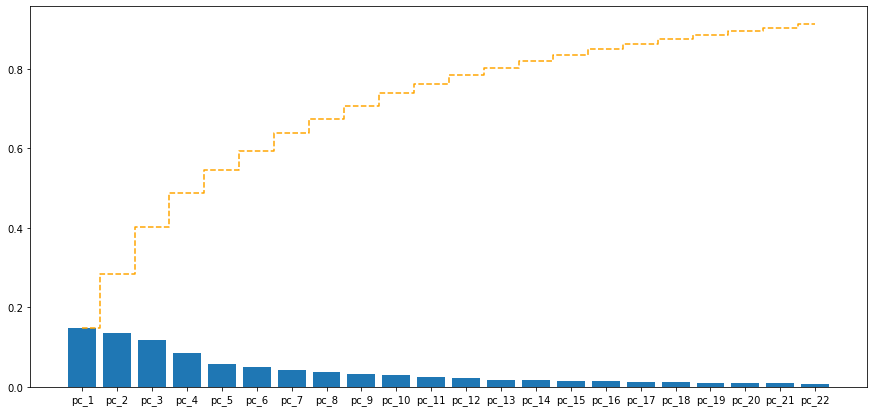

In [143]:
var_ratio= pca.explained_variance_ratio_

cum_sum = np.cumsum(var_ratio)
cum_sum
labels= ["pc_{}".format(n+1) for n in range(len(var_ratio))]
plt.figure(figsize=(15,7))
plt.bar(labels, var_ratio)
plt.step(labels, cum_sum, where= "mid", linestyle='dashed', color="orange" )
plt.plot()
plt.show()

In [144]:
pca_data = pca.fit_transform(X)

pca_data= pd.DataFrame(pca_data)
pca_data["target"]= y

In [148]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("var_0")
ax.set_ylabel("var_1")
ax.set_zlabel("var2")

for t in range(10):
    x_ = pca_data[pca_data.target==t][0]
    y_ = pca_data[pca_data.target==t][1]
    z_ = pca_data[pca_data.target==t][2]

    ax.scatter(x_, y_, z_, label= str(t) )


plt.legend()
plt.show()

In [16]:
#Se importan los datos
digits = load_digits()

X= digits.data
y= digits.target


## Detección atípicos


In [28]:
from sklearn.neighbors import LocalOutlierFactor 

In [17]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

from sklearn.manifold import TSNE

In [18]:
from sklearn.svm import OneClassSVM

In [19]:
svm= OneClassSVM(kernel= "linear")
#svm= OneClassSVM( )


SVM_labels=svm.fit_predict(X)

# El modelo etiqueta como -1 a los valores atípicos
#SVM_label= ["Típico" if label==1 else "Atípico" for label in SVM_labels]

In [20]:
atipicos= X[SVM_labels==-1]

In [21]:
(SVM_labels==-1).sum()

900

In [22]:
(SVM_labels==1).sum()

897

**NOTE: Descartamos el método SVM ya que una gran catidad de datos son catalogados como atípicos, a pesar de utilizar distintos tipos de kernels**

In [23]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors=2)#(n_neighbors=5)

LOF_lables= LOF.fit_predict(X)

In [24]:
out_LOF=X[LOF_lables==-1]

LOF_lables[LOF_lables==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

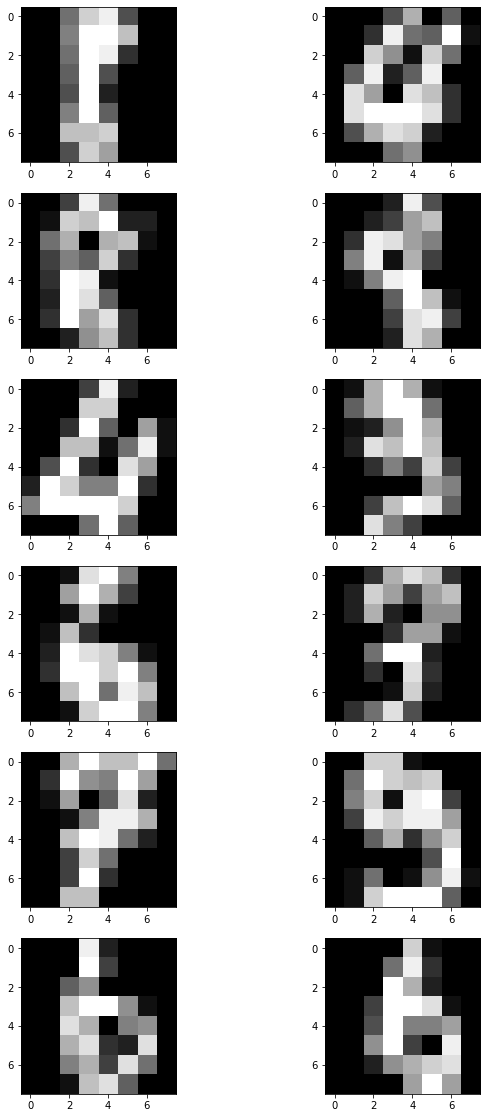

In [25]:
fig, ax = plt.subplots(6,2,figsize=(10,20))

for j in range(12):
    ax[j//2, j%2 ].imshow(out_LOF[j].reshape(8,8), cmap='gray')
    
plt.show()


## Kernel PCA

Kernel PCA proyecta los datos en un espacio de mayor dimensión y aplica Análisis de Componentes Principales. Como la transformación utilizada para aumentar proyectar depende de un kernel y en general no es lineal, esta técnica suele ser útil cuando los datos no son linealmente separables.

In [26]:
# "poly", "cosine"
kpca = KernelPCA(n_components=3, kernel='poly')
kpca_data = kpca.fit_transform(X)

kpca_data= pd.DataFrame(kpca_data)
kpca_data["target"]= y


In [27]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("var_0")
ax.set_ylabel("var_1")
ax.set_zlabel("var_2")

for t in range(10):
    x_ = kpca_data[kpca_data.target==t][0]
    y_ = kpca_data[kpca_data.target==t][1]
    z_ = kpca_data[kpca_data.target==t][2]

    ax.scatter(x_, y_, z_, label= str(t) )


plt.legend()
plt.show()

## Manifold: TSNE
One Class SVM utiliza el truco del kernel para proyectar los datos en un espacio de dimensión superior y encuentra el hiperplano que mejor separa al conjunto de datos del origen. Los datos que se encuentran separados por el hiperplano en el lado del origen son clasificados como atípicos.

In [29]:
#kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’


# "poly", "cosine"
TSNE_data = TSNE(n_components=3, random_state= 42).fit_transform(X)

TSNE_data= pd.DataFrame(TSNE_data)
TSNE_data["target"]= y

C:\Users\Andrew S\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Andrew S\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [30]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("var_0")
ax.set_ylabel("var_1")
ax.set_zlabel("var_2")

for t in range(10):
    x_ = TSNE_data[TSNE_data.target==t][0]
    y_ = TSNE_data[TSNE_data.target==t][1]
    z_ = TSNE_data[TSNE_data.target==t][2]

    ax.scatter(x_, y_, z_, label= str(t) )


plt.legend()
plt.show()

In [31]:
TSNE_data

,0,1,2,target
0,5.561688,-9.124728,-14.733070,0
1,-6.690330,-5.583112,-2.258718,1
2,-6.267070,7.755516,0.812202,2
3,4.704839,8.324692,7.678383,3
4,-4.746251,-14.607820,-3.217094,4
...,...,...,...,...
1792,11.087734,7.808840,1.099476,9
1793,0.900722,-10.722748,-12.980346,0
1794,-4.287469,2.177191,1.262803,8
1795,7.657171,5.996038,1.511767,9


Realizaremos un cluster con DBScan sobre las features extraidas por Manifold TSNE.

In [38]:
#Buscamos los parametros para DBSCAN que nos generan entre 8 y 15 clusters
X = TSNE_data.drop(columns='target')
params = {}
for ep,m_s in product(np.linspace(0.1,30),[x for x in range (1,45)]):
    cluster = DBSCAN(eps=ep, min_samples=m_s, n_jobs=-1)
    y_pred = cluster.fit(X).labels_
    if 8<len(Counter(y_pred))<15:
        params[f'{len(Counter(y_pred))}'] = {'eps':[],'min_sam':[]}
        params[f'{len(Counter(y_pred))}']['eps'].append(ep)
        params[f'{len(Counter(y_pred))}']['min_sam'].append(m_s)
#         print(len(Counter(y_pred)))
#         print(ep,m_s)

In [39]:
params

{'11': {'eps': [3.7612244897959184], 'min_sam': [44]},
 '9': {'eps': [3.7612244897959184], 'min_sam': [31]},
 '13': {'eps': [3.1510204081632653], 'min_sam': [44]},
 '12': {'eps': [3.1510204081632653], 'min_sam': [43]},
 '14': {'eps': [2.5408163265306123], 'min_sam': [37]},
 '10': {'eps': [3.7612244897959184], 'min_sam': [36]}}

**NOTE: Elegimos unos parámetros para generar un mayor número de clusters para observar los resultados que ésto genera**

In [40]:
# Elegimos la combinación de máxima densidad para la condición, mayor número de min numeros para un menor eps
cluster = DBSCAN(eps=3.1510204081632653, min_samples=44,n_jobs=-1)
X = TSNE_data.drop(columns='target')
y_pred = cluster.fit(X).labels_

In [41]:
print(Counter(y_pred)) #Vemos los clusters y su número de elementos

Counter({-1: 200, 7: 181, 0: 178, 5: 178, 6: 165, 1: 157, 3: 157, 2: 154, 9: 130, 10: 98, 8: 97, 4: 59, 11: 43})


In [55]:
Counter(y_pred).keys()

dict_keys([0, -1, 1, 3, 9, 5, 6, 8, 4, 2, 7, 10, 11])

In [48]:
#Se importan los datos
digits = load_digits()

X_d= digits.data
y_d= digits.target


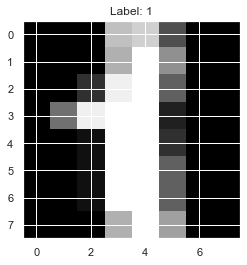

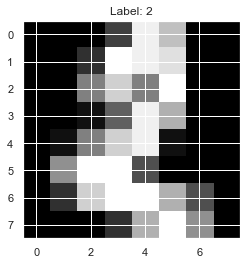

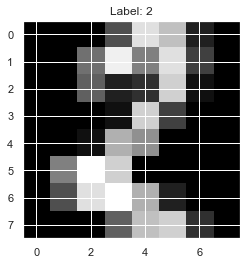

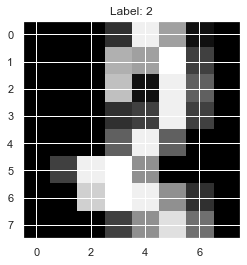

In [50]:
%matplotlib inline
# Visualizamos cuales fueron los elementos que se agrupó como ruido ie. label =-1
X_outliers = X_d[y_pred==-1]
y_outliers = y_d[y_pred==-1]
for i in range(4):
    x = X_outliers[i]
    y_ = y_outliers[i]
    number = x.reshape(8,8)
    plt.imshow(number, cmap='gray')
    plt.title(f'Label: {y_}')
    plt.show()


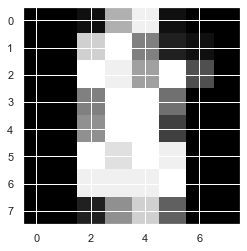

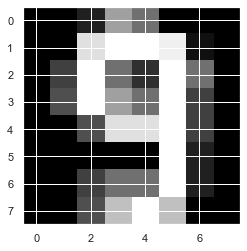

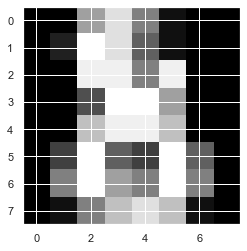

In [51]:
# Visualizamos los elementos que sí son core samples
X_clust = X_d[y_pred!=-1]
for x in X_clust[-3:]:
    noise_ex = x.reshape(8,8)
    plt.imshow(noise_ex, cmap='gray')
    plt.show()

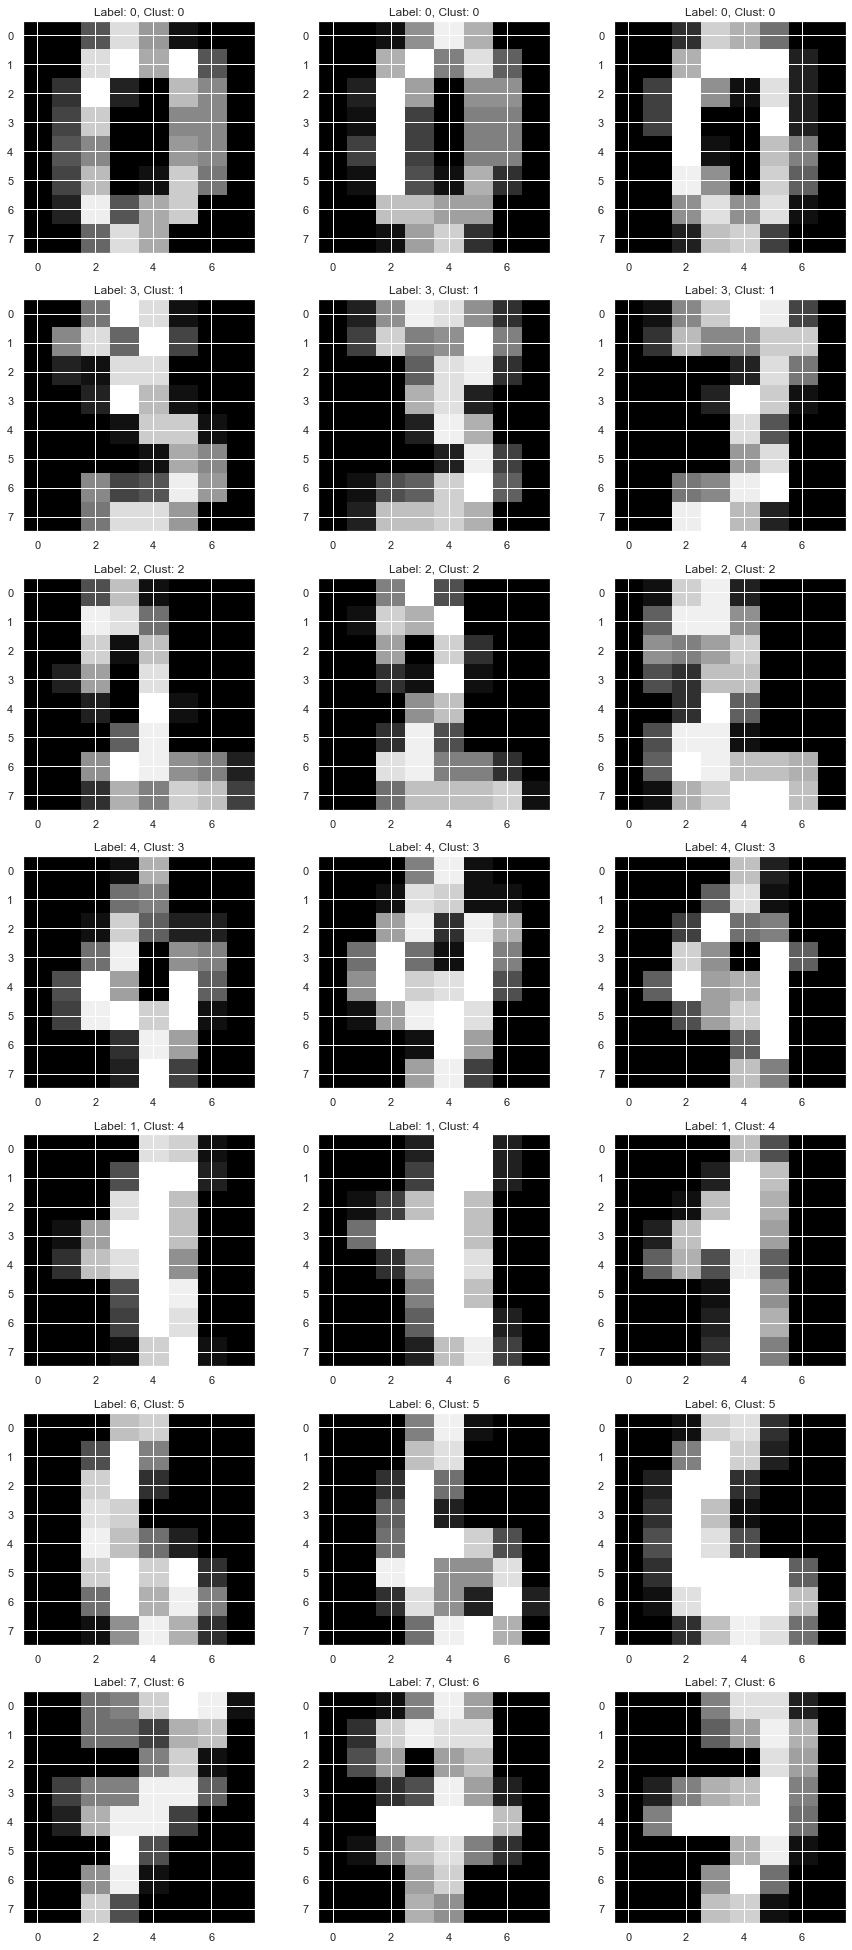

In [52]:
#Comparación entre el clustering por DBScan y las labels originales
fig, ax = plt.subplots(7,3,figsize=(15,35))
for j in range(0,7):
    X_verf = X_d[y_pred==j]
    y_verf = y_d[y_pred==j]
    for i in range(3):
        x = X_verf[i]
        y_ = y_verf[i]
        noise_ex = x.reshape(8,8)
        ax[j][i].imshow(noise_ex, cmap='gray')
        ax[j][i].set_title(f'Label: {y_}, Clust: {j}')
plt.show()

In [58]:
# Verificamos los clusters por la moda 
# De acuerdo a la etiqueta obtenemos el porcentaje 
# de números agrupados "correctamente"
for k in range(12):
    y_f = y[y_pred==k]
    y_mode = stats.mode(y_f)
    y_per = (y_mode[1][0] / len(y_f))*100
    print(f'Cluster: {k}, label: {y_mode[0][0]} by {y_per}%')

Cluster: 0, label: 0 by 100.0%
Cluster: 1, label: 3 by 99.36305732484077%
Cluster: 2, label: 2 by 100.0%
Cluster: 3, label: 4 by 100.0%
Cluster: 4, label: 1 by 93.22033898305084%
Cluster: 5, label: 6 by 99.43820224719101%
Cluster: 6, label: 7 by 99.39393939393939%
Cluster: 7, label: 5 by 98.89502762430939%
Cluster: 8, label: 8 by 96.90721649484536%
Cluster: 9, label: 9 by 99.23076923076923%
Cluster: 10, label: 1 by 96.93877551020408%
Cluster: 11, label: 8 by 100.0%


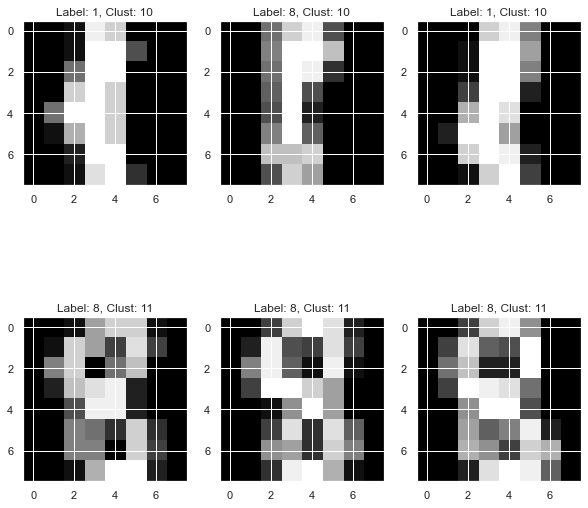

In [61]:
# Visualización de las diferencias entre los clusters 10 y 11
fig, ax = plt.subplots(2,3,figsize=(10,10))
for j in range(10,12):
    X_verf = X_d[y_pred==j]
    y_verf = y_d[y_pred==j]
    for i in range(3):
        x = X_verf[i]
        y_ = y_verf[i]
        noise_ex = x.reshape(8,8)
        ax[j-10][i].imshow(noise_ex, cmap='gray')
        ax[j-10][i].set_title(f'Label: {y_}, Clust: {j}')
plt.show()

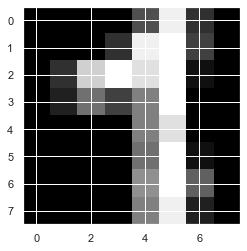

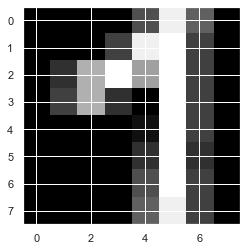

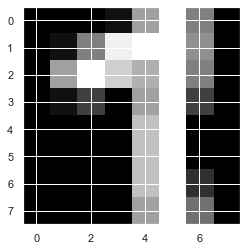

In [63]:
# Visualizamos los elementos que sí son core samples
X_clust = X_d[y_pred==4]
for x in X_clust[-3:]:
    noise_ex = x.reshape(8,8)
    plt.imshow(noise_ex, cmap='gray')
    plt.show()

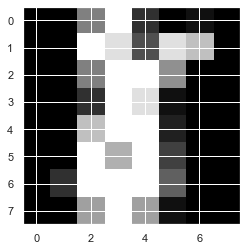

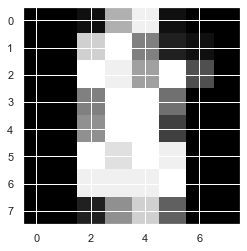

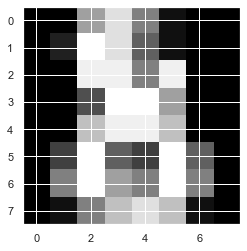

In [64]:
# Visualizamos los elementos que sí son core samples
X_clust = X_d[y_pred==8]
for x in X_clust[-3:]:
    noise_ex = x.reshape(8,8)
    plt.imshow(noise_ex, cmap='gray')
    plt.show()

Observemos que de los resultados DBScan ha encontrado dos grupos distintos para los números 8 y 1. Esta diferencia puede apreciarse en la forma que ambos tienen, en el primer cluster los número uno son escritos en dos trazos mientras que en el segundo en uno sólo, lo mismo pasa para los ocho, donde el segundo cluster se encuentran los números escritos como dos círculos conectados y en el primero como un "infinito" en un solo trazo. 

In [54]:
#Score de homogeneidad
homogeneity_score(y_d,y_pred)

0.8851002120017212

# Conclusiones y Reflexión

A lo largo de este notebook exploramos distintos algoritmos de aprendizaje no supervisado aplicados sobre el dataset `digits`. Notamos como un dataset de alta dimensionalidad como éste se aprovecha de la reducción de dimensiones por parte de KernelPCA, PCA y Manifold para lograr que algoritmos como DBScan generen mejores clusters con respecto al etiquetado original además de reducir considerablemente el número de observaciones fuera de _core samples_. De dichos clusters se observa incluso como dentro de la misma categoría el algoritmo puede identificar distintos tipos de un mísmo número, si se eligen los parámetros para un mayor número de clusters.

Por otro lado, en la detección de valores atípicos notamos una gran utilidad para la limpieza de un dataset ya que a pesar de que no todos los resultados encontrados como atípicos podrían ser catalogados como tales, se ha reducido la cantidad de imágenes que deban ser revisados por experiencia humana. Adicionalemente, a diferencia de BoxPlot, donde no se encontraría fácilmente los valores atípicos debido a que en este caso las características de cada observación tienen que ser interpretadas contextualmente con sus vecinos, LOF sí lo logra ya que éste se basa en calcular las distacncias entre los puntos del dataset y aprovechar la densidad de puntos en el vecindario para determinar si un dato es outlier de acuerdo a un score.
